# 부평구 실거래가 분석

### 국토교통부 실거래가 공개시스템
- http://rtdown.molit.go.kr

### 검색 내역
- 계약일자 : 20180101 ~ 20181231
- 실거래구분 : 연립다세대(매매)
- 주소구분 : 지번주소
- 시도 : 인천광역시
- 시군구/읍면동/면적/금액선택 : 전체

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('incheon_house.csv', skiprows=15)

In [3]:
df.head()

,시군구,번지,본번,부번,건물명,전용면적(㎡),대지권면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명
0,인천광역시 강화군 강화읍 갑곳리,36,36,0,(36-0),72.85,81.94,201803,11~20,"15,300",2,2015,갑룡길
1,인천광역시 강화군 강화읍 갑곳리,37-1,37,1,갑룡라이너스(37-1),58.41,64.50,201801,11~20,"12,000",2,2014,갑룡길
2,인천광역시 강화군 강화읍 갑곳리,37-11,37,11,갑룡라이너스(37-11),58.41,63.73,201801,11~20,"11,000",1,2014,갑룡길
3,인천광역시 강화군 강화읍 갑곳리,37-11,37,11,갑룡라이너스(37-11),58.41,63.73,201807,1~10,"10,500",1,2014,갑룡길
4,인천광역시 강화군 강화읍 갑곳리,345,345,0,강화,61.74,69.45,201806,1~10,"4,600",3,1985,강화대로312번길


In [4]:
df.columns

Index(['시군구', '번지', '본번', '부번', '건물명', '전용면적(㎡)', '대지권면적(㎡)', '계약년월', '계약일',
       '거래금액(만원)', '층', '건축년도', '도로명'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19108 entries, 0 to 19107
Data columns (total 13 columns):
시군구         19108 non-null object
번지          19108 non-null object
본번          19108 non-null int64
부번          19108 non-null int64
건물명         19108 non-null object
전용면적(㎡)     19108 non-null float64
대지권면적(㎡)    19108 non-null float64
계약년월        19108 non-null int64
계약일         19108 non-null object
거래금액(만원)    19108 non-null object
층           19108 non-null int64
건축년도        19108 non-null int64
도로명         18242 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 1.9+ MB


In [9]:
df['금액'] = df['거래금액(만원)'].str.replace(',','').astype(int)
df.head()

,시군구,번지,본번,부번,건물명,전용면적(㎡),대지권면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,금액
0,인천광역시 강화군 강화읍 갑곳리,36,36,0,(36-0),72.85,81.94,201803,11~20,"15,300",2,2015,갑룡길,15300
1,인천광역시 강화군 강화읍 갑곳리,37-1,37,1,갑룡라이너스(37-1),58.41,64.50,201801,11~20,"12,000",2,2014,갑룡길,12000
2,인천광역시 강화군 강화읍 갑곳리,37-11,37,11,갑룡라이너스(37-11),58.41,63.73,201801,11~20,"11,000",1,2014,갑룡길,11000
3,인천광역시 강화군 강화읍 갑곳리,37-11,37,11,갑룡라이너스(37-11),58.41,63.73,201807,1~10,"10,500",1,2014,갑룡길,10500
4,인천광역시 강화군 강화읍 갑곳리,345,345,0,강화,61.74,69.45,201806,1~10,"4,600",3,1985,강화대로312번길,4600


In [10]:
부평동 = df[df.시군구.str.contains('부평동')]
부평동.head()

,시군구,번지,본번,부번,건물명,전용면적(㎡),대지권면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,금액
11394,인천광역시 부평구 부평동,755-58,755,58,(755-58),42.84,25.23,201808,21~31,"12,300",2,1986,부남로8번길,12300
11395,인천광역시 부평구 부평동,755-67,755,67,(755-67),67.65,46.00,201811,1~10,"16,050",2,1986,부남로8번길,16050
11396,인천광역시 부평구 부평동,760-407,760,407,(760-407),46.00,27.72,201811,21~30,"14,350",4,2008,동수북로82번길,14350
11397,인천광역시 부평구 부평동,794-10,794,10,008831 지성탑스빌,58.06,26.06,201807,11~20,"15,150",4,2008,경원대로1256번길,15150
11398,인천광역시 부평구 부평동,794-10,794,10,008831 지성탑스빌,58.06,26.06,201808,21~31,"15,900",3,2008,경원대로1256번길,15900


In [11]:
부평동.shape

(1848, 14)

In [22]:
부평동[부평동['대지권면적(㎡)']>80]

,시군구,번지,본번,부번,건물명,전용면적(㎡),대지권면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,금액
11564,인천광역시 부평구 부평동,767-68,767,68,금강(767-68),55.60,86.5,201806,1~10,"8,700",2,1979,안남로15번길,8700
11565,인천광역시 부평구 부평동,767-68,767,68,금강(767-68),55.60,86.5,201812,11~20,"9,300",1,1979,안남로15번길,9300
12787,인천광역시 부평구 부평동,758-34,758,34,전인,58.91,88.7,201805,11~20,"9,000",1,1978,안남로15번길,9000
12788,인천광역시 부평구 부평동,758-34,758,34,전인,58.91,88.7,201808,21~31,"11,800",1,1978,안남로15번길,11800
12789,인천광역시 부평구 부평동,758-34,758,34,전인,58.91,88.7,201809,1~10,"11,200",1,1978,안남로15번길,11200


### 대지권면적 분석

In [26]:
부평대지 = 부평동[['대지권면적(㎡)', '건축년도', '금액']].values
부평대지[:5]

array([[   25.23,  1986.  , 12300.  ],
       [   46.  ,  1986.  , 16050.  ],
       [   27.72,  2008.  , 14350.  ],
       [   26.06,  2008.  , 15150.  ],
       [   26.06,  2008.  , 15900.  ]])

In [18]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/uni_hsr.ttf").get_name()
# h2gprm.ttf, uni_hsr.ttf, hynaml.ttf, nanumgothic.ttf
rc('font', family=font_name)

Text(0.5,1,'부평동 대지권면적별 매매가')

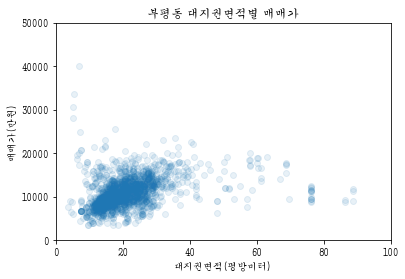

In [27]:
plt.scatter(부평대지[:,0], 부평대지[:,2], alpha=0.1)
plt.axis([0,100,0,50000])
plt.xlabel('대지권면적(평방미터)')
plt.ylabel('매매가(만원)')
plt.title('부평동 대지권면적별 매매가')

Text(0.5,1,'부평동 단위면적당 매매가')

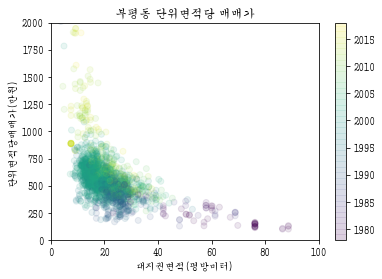

In [29]:
plt.scatter(부평대지[:,0], 부평대지[:,2]/부평대지[:,0], c=부평대지[:,1], alpha=0.1)
plt.colorbar()
plt.axis([0,100,0,2000])
plt.xlabel('대지권면적(평방미터)')
plt.ylabel('단위면적당매매가(만원)')
plt.title('부평동 단위면적당 매매가')

Text(0.5,1,'부평동 건축년도별 단위매매가')

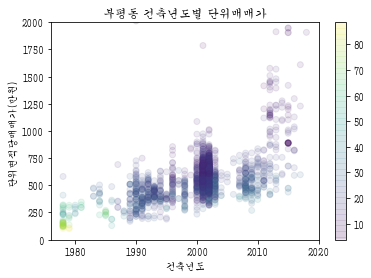

In [31]:
plt.scatter(부평대지[:,1], 부평대지[:,2]/부평대지[:,0], c=부평대지[:,0], alpha=0.1)
plt.colorbar()
#plt.axis([0,100,0,2000])
plt.ylim(0,2000)
plt.xlabel('건축년도')
plt.ylabel('단위면적당매매가(만원)')
plt.title('부평동 건축년도별 단위매매가')

[1999, 2006, 0, 2000]

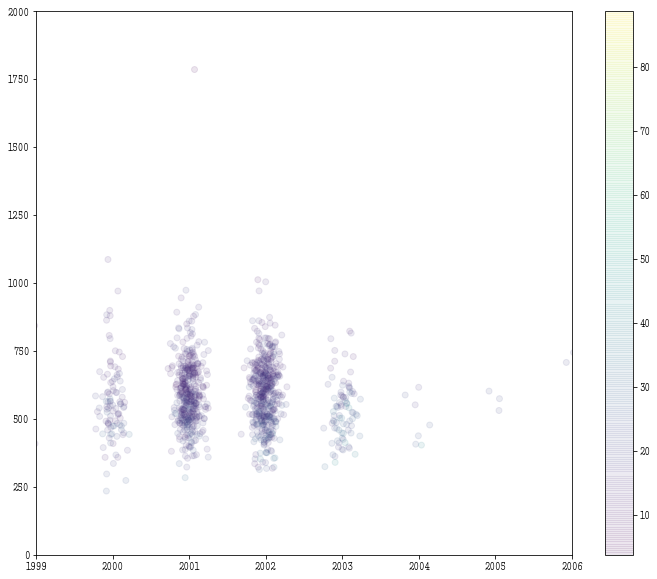

In [35]:
plt.figure(figsize=[12,10])
plt.scatter(부평대지[:,1]+np.random.randn(1848)/10, 부평대지[:,2]/부평대지[:,0], c=부평대지[:,0], alpha=0.1)
plt.colorbar()
plt.axis([1999,2006,0,2000])

### 전용면적 분석

In [36]:
부평전용 = 부평동[['전용면적(㎡)', '건축년도', '금액']].values
부평전용[:5]

array([[   42.84,  1986.  , 12300.  ],
       [   67.65,  1986.  , 16050.  ],
       [   46.  ,  2008.  , 14350.  ],
       [   58.06,  2008.  , 15150.  ],
       [   58.06,  2008.  , 15900.  ]])

Text(0.5,1,'부평동 전용면적별 매매가')

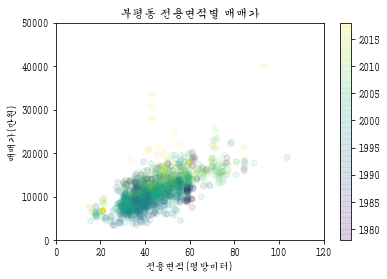

In [40]:
plt.scatter(부평전용[:,0], 부평전용[:,2], c=부평전용[:,1], alpha=0.1)
plt.colorbar()
plt.axis([0,120,0,50000])
plt.xlabel('전용면적(평방미터)')
plt.ylabel('매매가(만원)')
plt.title('부평동 전용면적별 매매가')

Text(0.5,1,'부평동 평당 매매가')

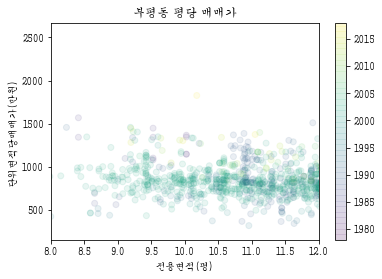

In [44]:
plt.scatter(부평전용[:,0]/3.3, 부평전용[:,2]/부평전용[:,0]*3.3, c=부평전용[:,1], alpha=0.1)
plt.colorbar()
#plt.axis([0,100,0,2000])
plt.xlim(8,12)
plt.xlabel('전용면적(평)')
plt.ylabel('단위면적당매매가(만원)')
plt.title('부평동 평당 매매가')

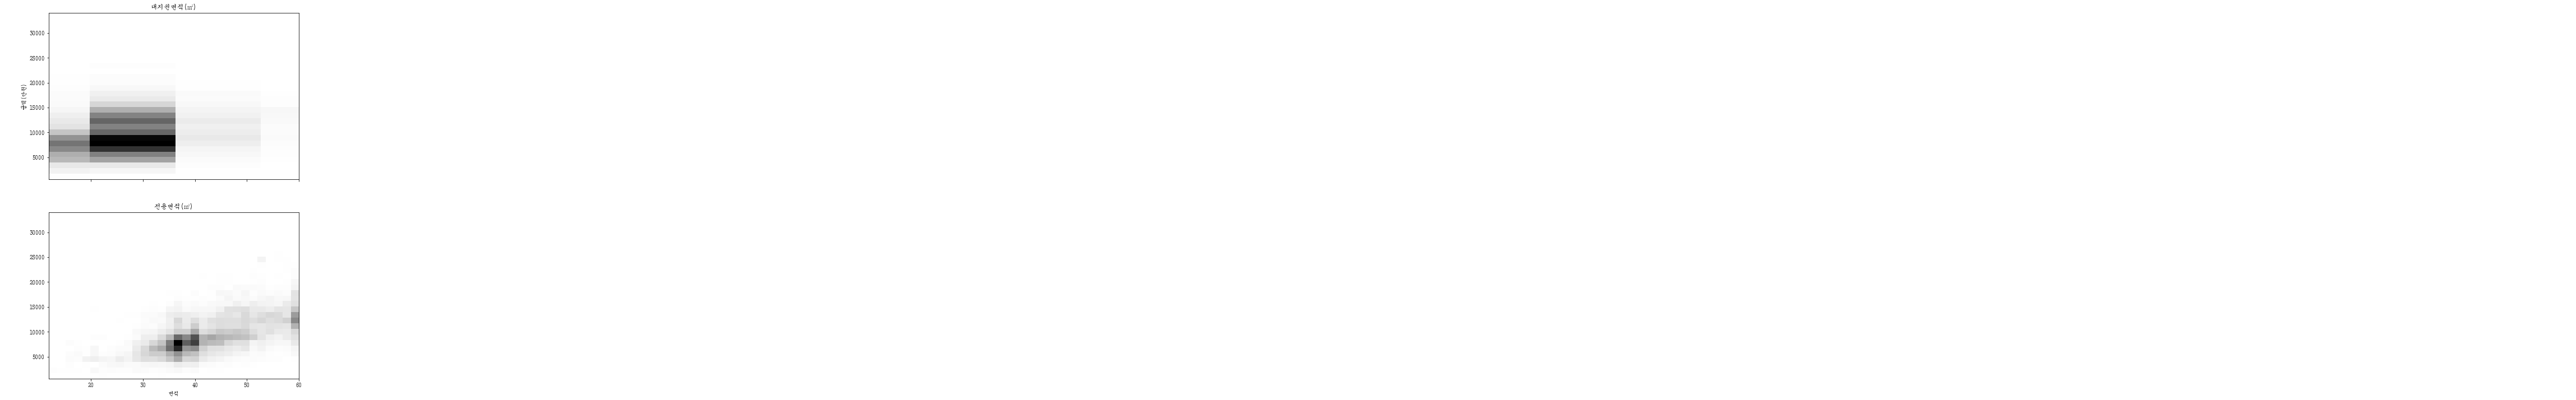

In [84]:
df2 = df[df['전용면적(㎡)']<60]

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/uni_hsr.ttf").get_name()
# h2gprm.ttf, uni_hsr.ttf, hynaml.ttf, nanumgothic.ttf
rc('font', family=font_name)

# plt.scatter(df['대지권면적(㎡)'],df['금액'], alpha=0.1)
# plt.scatter(df['전용면적(㎡)'],df['금액'], alpha=0.1)
fig,ax = plt.subplots(2,1,sharex=True, sharey=True, figsize=[8,12])
ax[0].set_title('대지권면적(㎡)')
ax[0].hist2d(df2['대지권면적(㎡)'], df2['금액'], bins=30, cmap='gray_r')
ax[1].set_title('전용면적(㎡)')
ax[1].hist2d(df2['전용면적(㎡)'], df2['금액'], bins=30, cmap='gray_r')
ax[0].set_ylabel('금액(만원)')
ax[1].set_xlabel('면적')
# plt.xlim(0,30)
# plt.ylim(0,10000)
# plt.colorbar()
pass

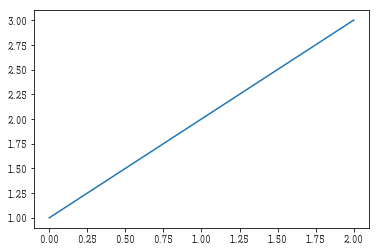

In [87]:
plt.plot([1,2,3])

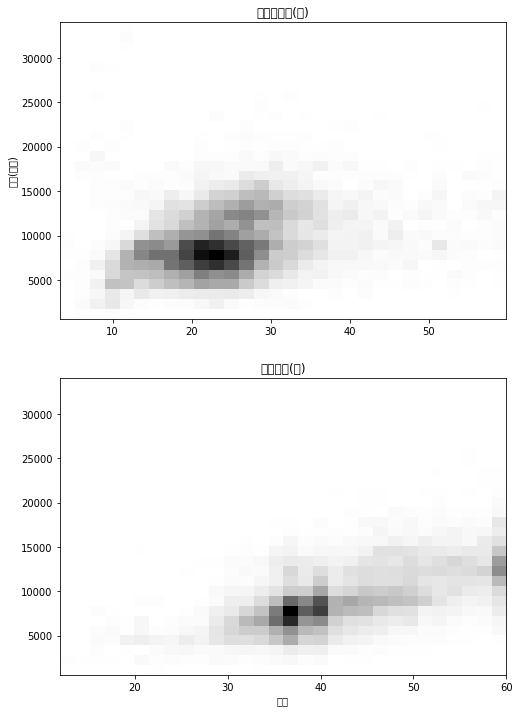

In [7]:
df2 = df[(df['전용면적(㎡)']<60) & (df['대지권면적(㎡)']<60)]

# fig,ax = plt.subplots(2,1,sharex=True, sharey=True, figsize=[8,12])
fig,ax = plt.subplots(2,1,figsize=[8,12])
ax[0].set_title('대지권면적(㎡)')
ax[0].hist2d(df2['대지권면적(㎡)'], df2['금액'], bins=30, cmap='gray_r')
ax[1].set_title('전용면적(㎡)')
ax[1].hist2d(df2['전용면적(㎡)'], df2['금액'], bins=30, cmap='gray_r')
ax[0].set_ylabel('금액(만원)')
ax[1].set_xlabel('면적')

pass

In [8]:
df2.head()

,시군구,번지,본번,부번,건물명,전용면적(㎡),대지권면적(㎡),계약년월,계약일,거래금액(만원),층,건축년도,도로명,금액
11,인천광역시 강화군 강화읍 갑곳리,78,78,0,궁전빌라,48.080,47.72,201804,21~30,"5,000",2,1991,갑룡길73번길,5000
16,인천광역시 강화군 강화읍 갑곳리,346-26,346,26,"대해빌라(가,나동)",44.730,40.08,201806,1~10,"5,000",3,1990,갑룡길,5000
17,인천광역시 강화군 강화읍 갑곳리,346-25,346,25,"대해빌라(다,라동)",44.721,39.92,201804,11~20,"4,700",2,1990,갑룡길,4700
18,인천광역시 강화군 강화읍 갑곳리,346-25,346,25,"대해빌라(다,라동)",44.721,39.92,201805,21~31,"4,000",3,1990,갑룡길,4000
23,인천광역시 강화군 강화읍 갑곳리,388-3,388,3,미미빌라,40.680,31.17,201809,11~20,"5,000",2,1989,갑룡길,5000


In [10]:
house = df2[['전용면적(㎡)','금액']].values

In [11]:
house[:5]

array([[  48.08 , 5000.   ],
       [  44.73 , 5000.   ],
       [  44.721, 4700.   ],
       [  44.721, 4000.   ],
       [  40.68 , 5000.   ]])

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(house[:,[0]], house[:,1])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
model.coef_, model.intercept_

(array([226.95080929]), -337.0389157461432)

In [14]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/uni_hsr.ttf").get_name()
# h2gprm.ttf, uni_hsr.ttf, hynaml.ttf, nanumgothic.ttf
rc('font', family=font_name)

Text(10,25000,'절편값: -337.0389157461432')

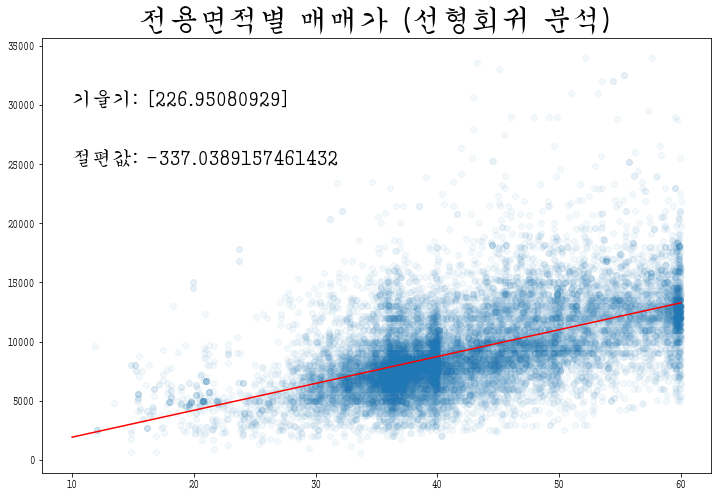

In [21]:
plt.figure(figsize=[12,8])
plt.title('전용면적별 매매가 (선형회귀 분석)', fontsize=30)
plt.scatter(house[:,0], house[:,1], alpha=0.05)
rng = np.array([10,60])
plt.plot(rng, model.coef_*rng + model.intercept_, 'r-')
plt.text(10,30000,'기울기: '+str(model.coef_), fontsize=20)
plt.text(10,25000,'절편값: '+str(model.intercept_), fontsize=20)